In [1]:
import os

import numpy as np
from torch.utils.data import DataLoader
from augmentloader import AugmentLoader
from torch.optim import SGD

import train_func as tf
from loss import MaximalCodingRateReduction
import utils
import matplotlib
import matplotlib.pyplot as plt

In [17]:
cpb = 10

In [71]:
def get_indices_for_label_batch(lb_batch,dt):
    res = []
    for i in range(len(dt)):
        if dt[i][1] in lb_batch:
            res.append(i)
    return res

In [2]:
transforms = tf.load_transforms('default')

In [4]:
trainset = tf.load_trainset('cifar100', transforms, path='./data/')

Extracting ./data/cifar100/cifar-100-python.tar.gz to ./data/cifar100


In [32]:
trainset.num_classes

100

In [33]:
assert trainset.num_classes % cpb == 0

In [80]:
classes = np.unique(trainset.targets)

In [82]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [38]:
class_batch_list = classes.reshape(trainset.num_classes//cpb,cpb)

In [86]:
trainset.num_classes//cpb * 2

20

In [90]:
os.path.join('asdas',str(2))

'asdas/2'

In [72]:
train_ids = get_indices_for_label_batch(class_batch_list[0,:],trainset)

In [46]:
import torch

In [73]:
sub_trainset = torch.utils.data.Subset(trainset, train_ids)

In [77]:
trainloader = torch.utils.data.DataLoader(
                trainset,
                batch_size=10,
                drop_last=True,
                num_workers=4,
            )

In [74]:
sub_trainloader = torch.utils.data.DataLoader(
                sub_trainset,
                batch_size=100,
                drop_last=True,
                num_workers=4,
            )

In [75]:
for step, (batch_imgs, batch_lbls) in enumerate(sub_trainloader):
    print('step {}, batch {}, labels {}'.format(step,batch_imgs, batch_lbls))
    break

step 0, batch tensor([[[[0.9725, 0.9725, 0.9686,  ..., 0.0000, 0.0000, 0.0000],
          [0.9647, 0.9647, 0.9608,  ..., 0.0000, 0.0000, 0.0000],
          [0.9608, 0.9608, 0.9608,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.9490, 0.9490, 0.9451,  ..., 0.0000, 0.0000, 0.0000],
          [0.9373, 0.9373, 0.9255,  ..., 0.0000, 0.0000, 0.0000],
          [0.9333, 0.9176, 0.8941,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.8902, 0.8902, 0.8902,  ..., 0.0000, 0.0000, 0.0000],
          [0.8784, 0.8784, 0.8706,  ..., 0.0000, 0.0000, 0.0000],
          [0.8627, 0.8549, 0

In [78]:
for step, (batch_imgs, batch_lbls) in enumerate(trainloader):
    print('step {}, batch {}, labels {}'.format(step,batch_imgs, batch_lbls))
    break

step 0, batch tensor([[[[0.6157, 0.6902, 0.6157,  ..., 1.0000, 0.0000, 0.0000],
          [0.6118, 0.5725, 0.4941,  ..., 1.0000, 0.0000, 0.0000],
          [0.6941, 0.5451, 0.5490,  ..., 1.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.6431, 0.6510, 0.5294,  ..., 1.0000, 0.0000, 0.0000],
          [0.5882, 0.4235, 0.2941,  ..., 1.0000, 0.0000, 0.0000],
          [0.6353, 0.3804, 0.3294,  ..., 1.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.4627, 0.5059, 0.3882,  ..., 1.0000, 0.0000, 0.0000],
          [0.5059, 0.3059, 0.1412,  ..., 1.0000, 0.0000, 0.0000],
          [0.5843, 0.2667, 0

In [67]:
data[0].shape

torch.Size([10, 3, 32, 32])

In [2]:
mcr_acc = [0.648,0.479,0.454,0.387,0.418,0.399,0.379,0.371,0.409,0.407]
ce_acc = [0.841,0,0,0,0,0,0,0,0,0]

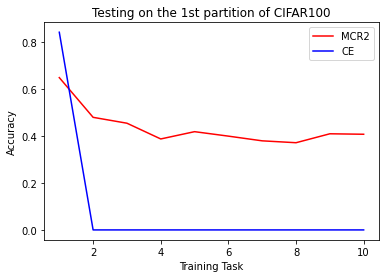

In [8]:
plt.plot(np.arange(10)+1,mcr_acc,color='r',label='MCR2')
plt.plot(np.arange(10)+1,ce_acc,color='b',label='CE')
plt.xlabel('Training Task')
plt.ylabel('Accuracy')
plt.title('Testing on the 1st partition of CIFAR100')
plt.legend()